## Multivariate Logistic Regression

We will take a look at a multivariate logistic regression that has 3 explanatory variables.  We will split the data into two parts, namely train and test data. We will build the logistic model with the training data and test it with the test data. We will then assess the accuracy of the model, using a Confusion Matrix. Finally, we will predict, using new data.

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [2]:
# Example warehouse data set
rate = pd.read_csv('make_rate.csv')
rate.head()

,products,process,months,rate
0,700,18,5,1
1,600,34,4,0
2,200,18,2,0
3,600,12,3,0
4,263,60,4,0


In [3]:
len(rate)

100

In [4]:
# Data variables
# Number of products handled in a work shift by a warehouse worker
# Average process time in seconds for product
# Training months in number of months
# Outcome variable:  Ability to make standard work rate, 1(yes), 0(no)
rate[["products", "process", "months"]].describe()

,products,process,months
count,100.000000,100.000000,100.00000
mean,1136.540000,25.950000,5.65000
std,675.049469,13.920681,3.32233
min,100.000000,7.000000,1.00000
25%,590.000000,13.750000,3.00000
50%,1000.000000,25.000000,5.00000
75%,1666.250000,34.250000,8.00000
max,2450.000000,60.000000,12.00000


In [5]:
# Check the frequency counts for our outcome variable, rate
rate['rate'].value_counts()

0    51
1    49
Name: rate, dtype: int64

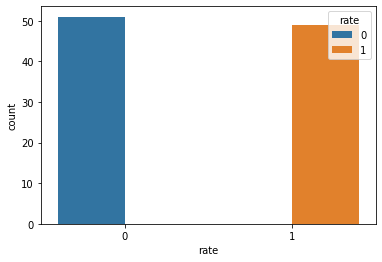

In [6]:
sns.countplot(x='rate',hue='rate',data=rate)

### Collinearity

In [7]:
# Check for collinearity amongst explanatory variables to make sure they are not highly correlated
rate_corr = rate[["products", "process", "months"]].corr()
print(rate_corr)

          products   process    months
products  1.000000 -0.684328  0.696934
process  -0.684328  1.000000 -0.569544
months    0.696934 -0.569544  1.000000


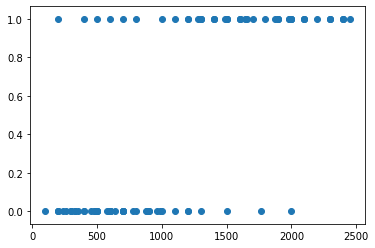

In [8]:
import matplotlib.pyplot as plot
# Use scatterplot of data
plot.scatter(rate['products'],rate['rate'])

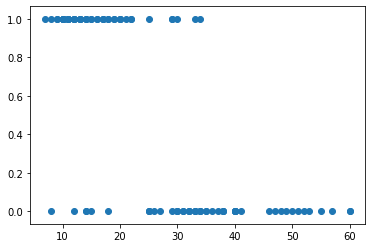

In [9]:
import matplotlib.pyplot as plot
# Use scatterplot of data
plot.scatter(rate['process'],rate['rate'])

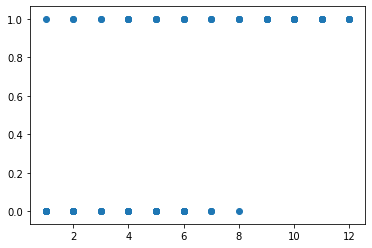

In [10]:
import matplotlib.pyplot as plot
# Use scatterplot of data
plot.scatter(rate['months'],rate['rate'])

### Multivariate Logistic Regression Model

Hypothesis Testing

Null hypothesis H0:   no effect, b1=0, b2=0, b3=0
    
Alternative hypothesis H1: effect exist
    
b1 is not equal to 0

b2 is not equal to 0

b3 is not equal to 0

In [11]:
# Multivariate Logistic Regression Model, using statsmodels
model = sm.GLM.from_formula("rate ~ products + process + months", family=sm.families.Binomial(), data=rate)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   rate   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.182
Date:                Sun, 16 Feb 2020   Deviance:                       58.363
Time:                        22:50:46   Pearson chi2:                     84.0
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0597      1.495     -0.040      0.968      -2.991       2.871
products       0.0015      0.001      2.139      0.032       0.000       0.003
process       -0.1245      0.039     -3.155      0.002      -0.202      -0.047
months         0.2410      0.146      1.653      0.098      -0.045       0.527
==============================================================================
"""

Both products and process variables are statistically significant. However, the number of training months is not found to be statistically significant.  The effect size are small.  The process variable conforms to our expectation of a negative relationship with rate.

In [12]:
# Rerun Multivariate Logistic Regression Model with 2 explanatory variables
# remove the variable months
model = sm.GLM.from_formula("rate ~ products + process", family=sm.families.Binomial(), data=rate)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   rate   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30.627
Date:                Sun, 16 Feb 2020   Deviance:                       61.254
Time:                        22:52:58   Pearson chi2:                     88.2
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0053      1.305      0.771      0.441      -1.552       3.562
products       0.0020      0.001      3.051      0.002       0.001       0.003
process       -0.1344      0.038     -3.547      0.000      -0.209      -0.060
==============================================================================
"""

Both variables, number of products and the number of seconds in processing are both statistically significant yet the size effects are still small.  The negative sign on the coefficient for process conforms to our expectation that a smaller processing in seconds would be associated with the outcome variable of making rate.

### Model Prediction and Evaluation

In [13]:
X = rate[['products', 'process']]
y = rate['rate']

In [14]:
# Split data with ratio 75-25
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.21.3


In [16]:
# Logistic Regression Model

# Create logistic regression model
logistic_regression= LogisticRegression()

# Fit the model, using the training data
model = logistic_regression.fit(X_train,y_train)

# Obtain the predicted values for the test data set
y_pred=logistic_regression.predict(X_test)

Accuracy:  0.76


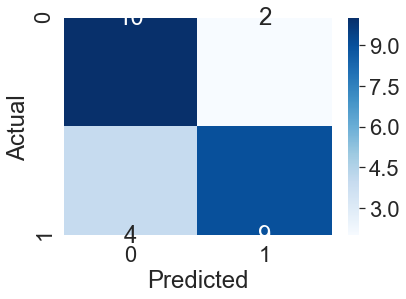

In [17]:
# Use seaborn to show confusion matrix
import numpy as np
sns.set(font_scale=2)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

As can be observed from the Confusion Matrix:

TP = True Positives = 9

TN = True Negatives = 10

FP = False Positives = 2

FN = False Negatives = 4

You can then also get the Accuracy using:

Accuracy = (TP+TN)/Total

(9+10)/25 = 0.76

The accuracy is therefore 76% for the test set.

In [18]:
print (y_pred) #predicted values

[1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0]


In [19]:
# Let's look at some new data that comes our way and find out the predictions.

# Python dictionary of new data
new_data = {'products': [1590, 1240, 1680, 510, 710],
                  'process': [20, 33, 13, 42, 35]
                  
           }

# Convert dictionary to a pandas data frame
new_data = pd.DataFrame(new_data,columns= ['products', 'process'])

# pass in to the model to obtain predicted y values
y_pred = logistic_regression.predict(new_data)

#print(new_data)
print(y_pred)

[1 0 1 0 0]


With this new data, we can predict that the first and third workers will make rate.

In [ ]:
# end